In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
%cd '/content/drive/MyDrive/sample data/leapGestRecog'

/content/drive/MyDrive/sample data/leapGestRecog


In [21]:
import warnings
warnings.filterwarnings('ignore')
import keras
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout

In [22]:
CATEGORIES = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
IMG_SIZE = 50
data_path = r"/content/drive/MyDrive/sample data/leapGestRecog/leapGestRecog"

In [23]:
image_data = []
for dr in os.listdir(data_path):
    for category in CATEGORIES:
        class_index = CATEGORIES.index(category)
        path = os.path.join(data_path, dr, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)), class_index])
            except Exception as e:
                pass
image_data[0]

[array([[4, 5, 6, ..., 5, 5, 4],
        [5, 6, 6, ..., 4, 4, 3],
        [5, 6, 5, ..., 4, 4, 4],
        ...,
        [4, 5, 5, ..., 5, 6, 5],
        [4, 5, 5, ..., 4, 5, 4],
        [5, 5, 5, ..., 4, 4, 4]], dtype=uint8),
 0]

In [24]:
import random
random.shuffle(image_data)

In [25]:
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)

In [26]:
label[:10]


[4, 6, 1, 0, 9, 5, 7, 9, 2, 1]

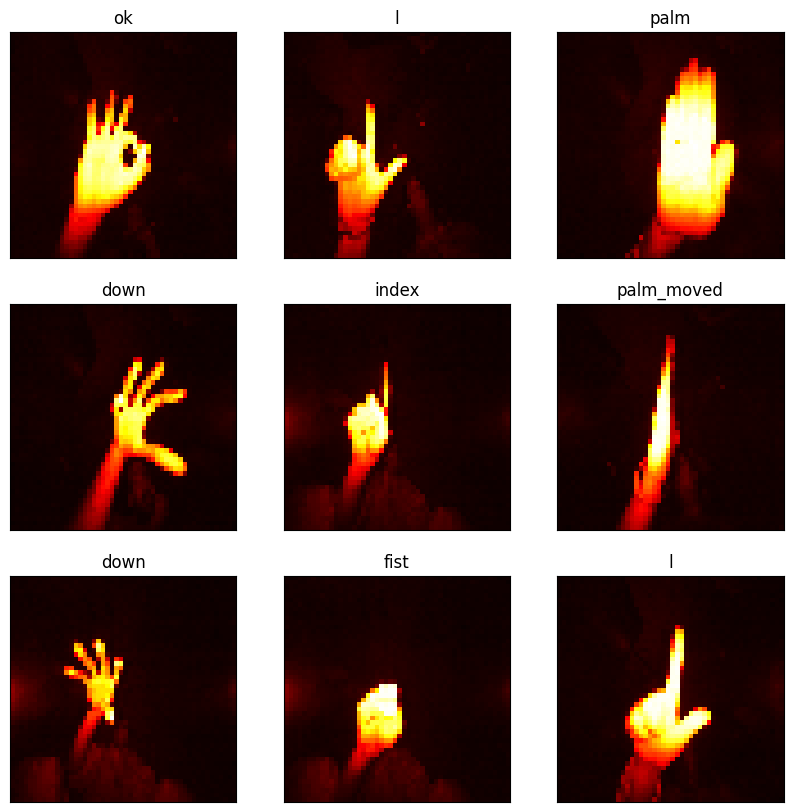

In [27]:
plt.figure(1, figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0], cmap='hot')
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[label[i]][3:])
plt.show()

In [28]:
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(20030, 50, 50)

In [29]:
label = keras.utils.to_categorical(label, num_classes=10,dtype='i1')
label[0]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int8)

In [30]:
input_data.shape = (-1, IMG_SIZE, IMG_SIZE, 1)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.3, random_state=0)

In [32]:
model = keras.models.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (IMG_SIZE, IMG_SIZE, 1)))
model.add(Activation('relu'))


model.add(Conv2D(filters = 32, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

In [33]:
model.fit(X_train, y_train, epochs = 7, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/7
439/439 [==============================] - 130s 292ms/step - loss: 0.3578 - accuracy: 0.8800 - val_loss: 0.0103 - val_accuracy: 0.9978
Epoch 2/7
439/439 [==============================] - 122s 278ms/step - loss: 0.0174 - accuracy: 0.9947 - val_loss: 0.0384 - val_accuracy: 0.9880
Epoch 3/7
439/439 [==============================] - 125s 284ms/step - loss: 0.0082 - accuracy: 0.9976 - val_loss: 0.0382 - val_accuracy: 0.9923
Epoch 4/7
439/439 [==============================] - 122s 279ms/step - loss: 0.0041 - accuracy: 0.9984 - val_loss: 0.0018 - val_accuracy: 0.9993
Epoch 5/7
439/439 [==============================] - 135s 307ms/step - loss: 0.0057 - accuracy: 0.9988 - val_loss: 0.0121 - val_accuracy: 0.9947
Epoch 6/7
439/439 [==============================] - 134s 306ms/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 3.0736e-04 - val_accuracy: 0.9998
Epoch 7/7
439/439 [==============================] - 129s 293ms/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 5.1903e-04 

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 46, 46, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 46, 46, 32)        0         
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 23, 23, 32)        0         
                                                      

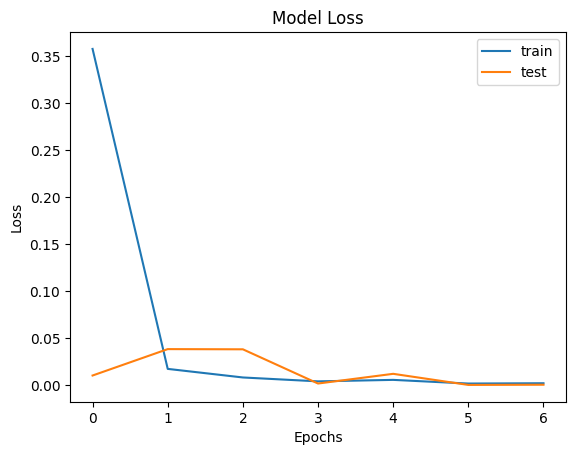

In [35]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

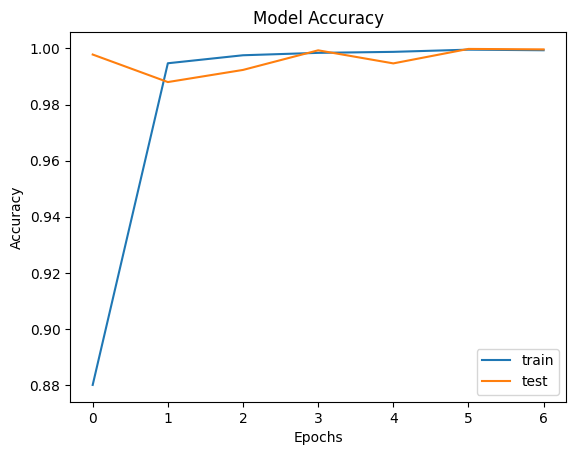

In [36]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [37]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

188/188 [==============================] - 14s 74ms/step - loss: 5.1903e-04 - accuracy: 0.9997
Test accuracy: 99.97%


188/188 [==============================] - 13s 69ms/step


[]

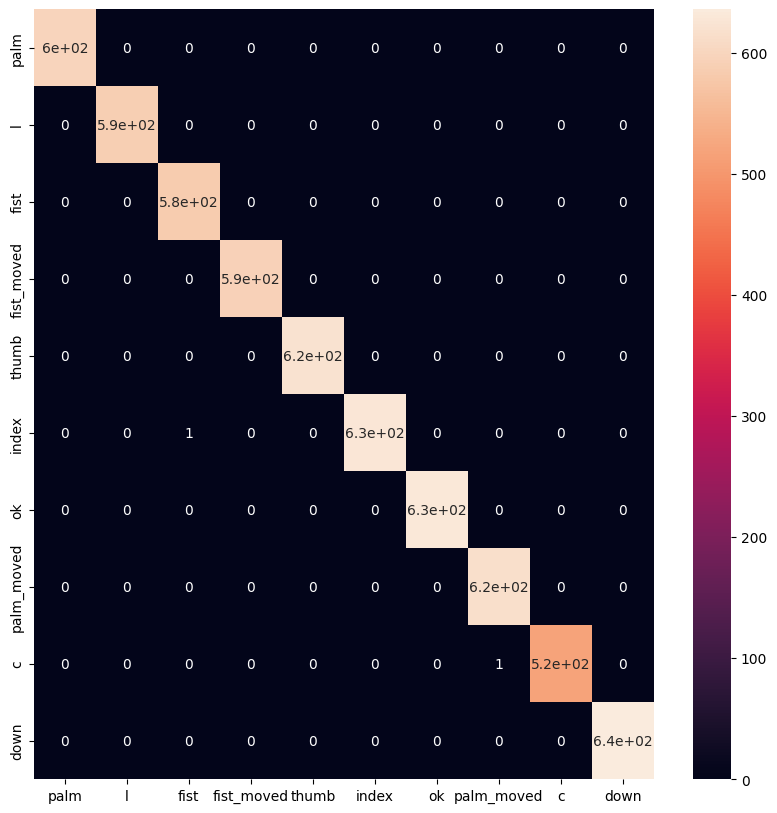

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cat = [c[3:] for c in CATEGORIES]
plt.figure(figsize=(10,10))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1))
sn.heatmap(cm, annot=True,xticklabels=cat, yticklabels=cat)
plt.plot()